In [4]:
import pandas as pd
import pycountry
import pycountry_convert as pc

# Función para obtener el nombre del continente a partir del nombre del país
def get_continent(country_name):
    try:
        country_code = pycountry.countries.lookup(country_name).alpha_2
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except LookupError:
        return None

# Cargar el dataset
df_felicidad = pd.read_csv('./datos/ranking_felicidad.csv')

# Agregar una nueva columna 'continent' con el nombre del continente
df_felicidad['continent'] = df_felicidad['Country name'].apply(get_continent)

# Verificar los primeros registros para asegurarse de que los continentes se han agregado correctamente
print(df_felicidad.head())

  Country name  year Life Ladder Log GDP per capita Social support  \
0  Afghanistan  2008       3,724              7,350          0,451   
1  Afghanistan  2009       4,402              7,509          0,552   
2  Afghanistan  2010       4,758              7,614          0,539   
3  Afghanistan  2011       3,832              7,581          0,521   
4  Afghanistan  2012       3,783              7,661          0,521   

  Healthy life expectancy at birth Freedom to make life choices Generosity  \
0                           50,500                        0,718      0,164   
1                           50,800                        0,679      0,187   
2                           51,100                        0,600      0,118   
3                           51,400                        0,496      0,160   
4                           51,700                        0,531      0,234   

  Perceptions of corruption Positive affect Negative affect continent  
0                     0,882           

In [32]:
df_felicidad_sin_nulos = df_felicidad.dropna()

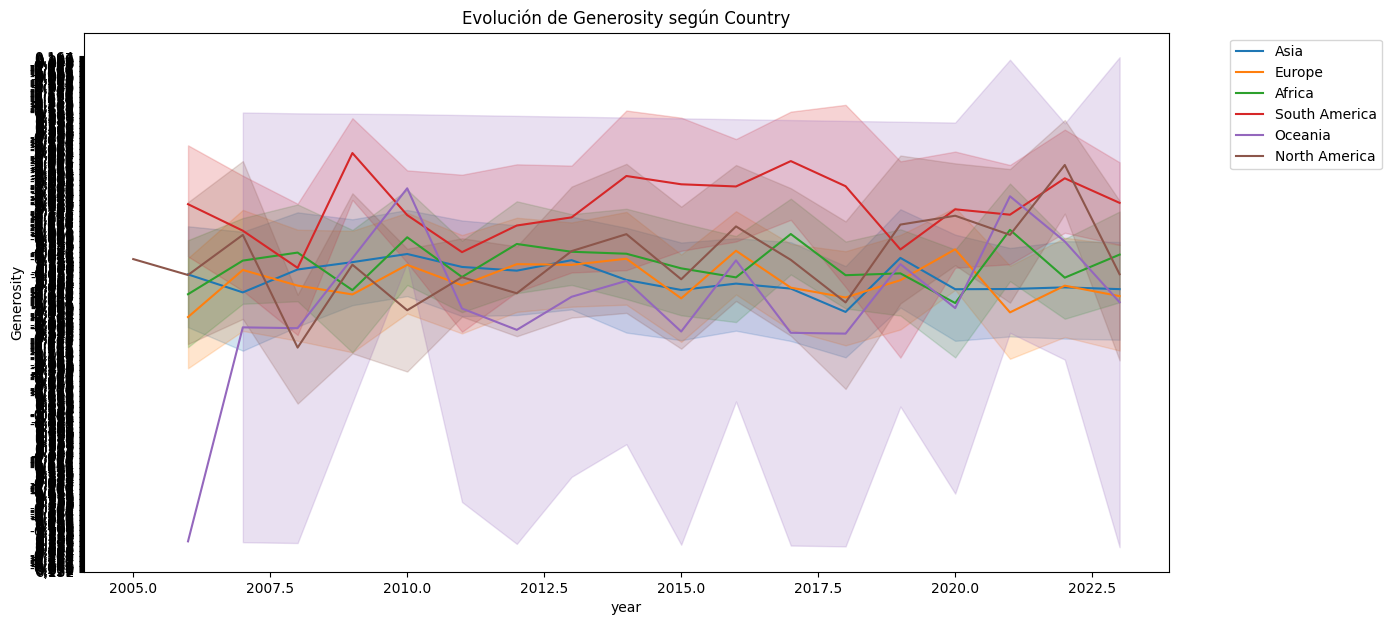

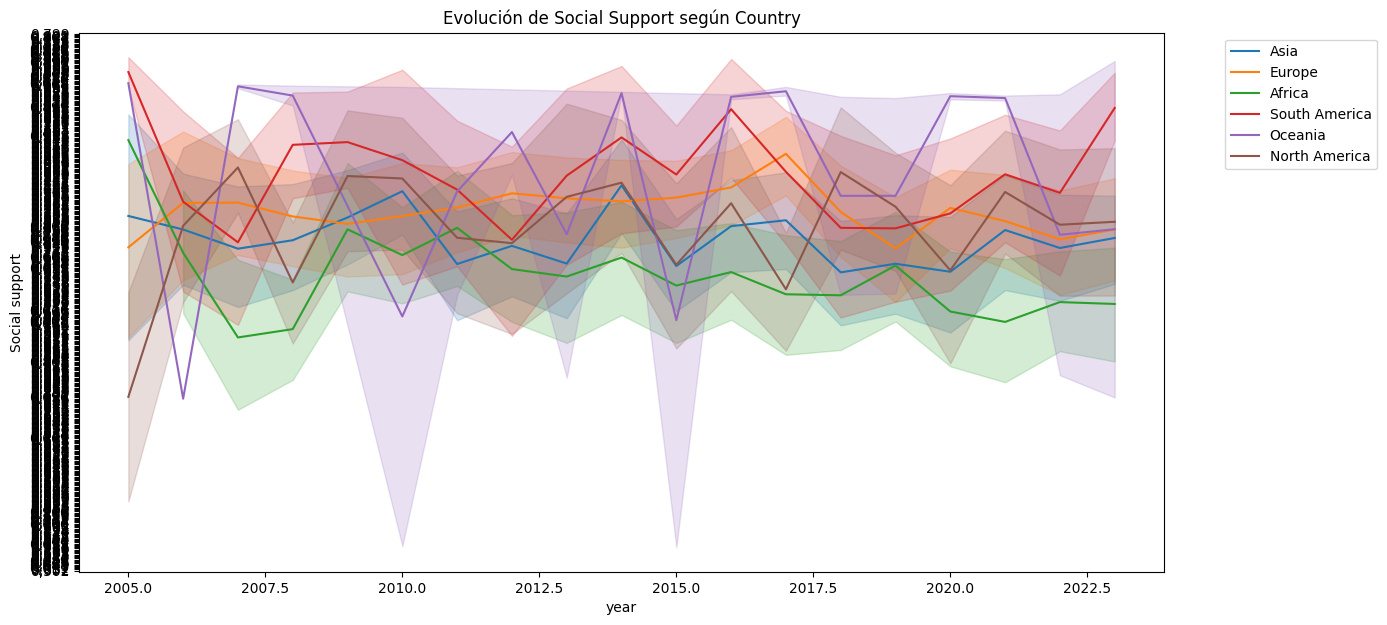

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Evolución de Generosity según Country
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_felicidad, x='year', y='Generosity', hue='continent')
plt.title('Evolución de Generosity según Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Evolución de Social Support según Country
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_felicidad, x='year', y='Social support', hue='continent')
plt.title('Evolución de Social Support según Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [11]:
numeric_columns = ['Life Ladder', 'Log GDP per capita', 'Social support', 
                   'Healthy life expectancy at birth', 'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption', 
                   'Positive affect', 'Negative affect']

for col in numeric_columns:
    df_felicidad[col] = df_felicidad[col].str.replace(',', '.').astype(float)

In [36]:
df_felicidad.value_counts("continent")

continent
Asia             660
Europe           616
Africa           548
North America    204
South America    181
Oceania           34
Name: count, dtype: int64

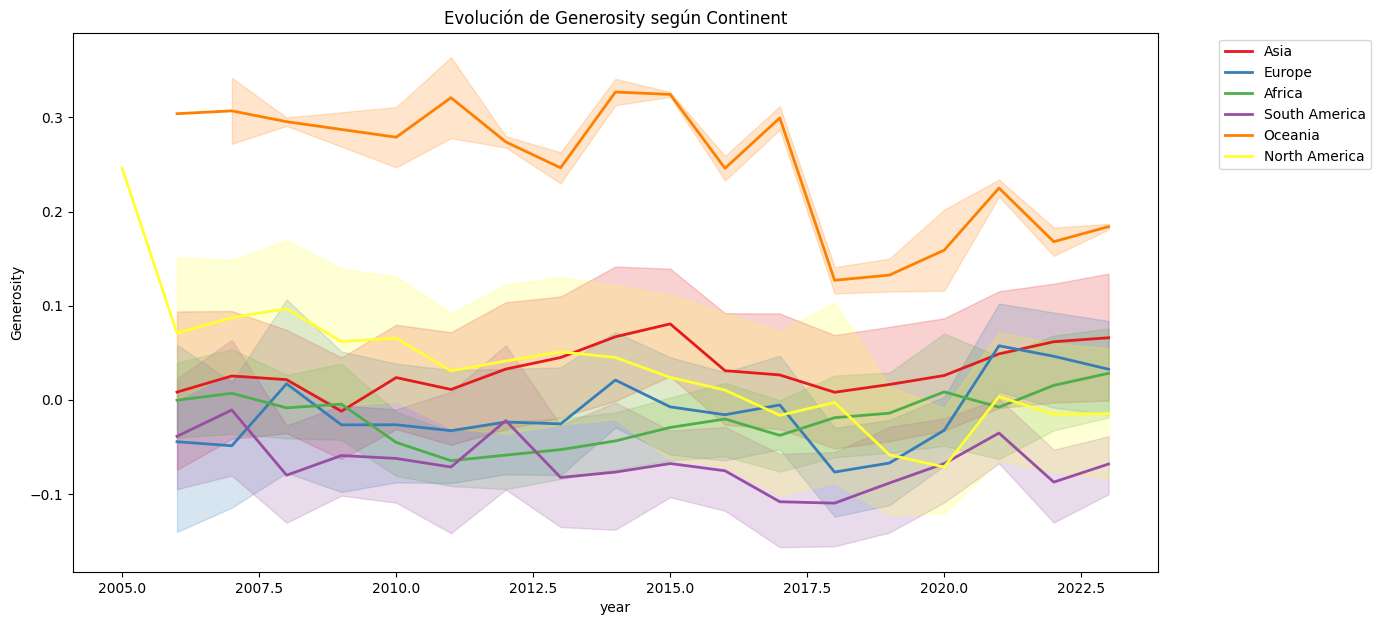

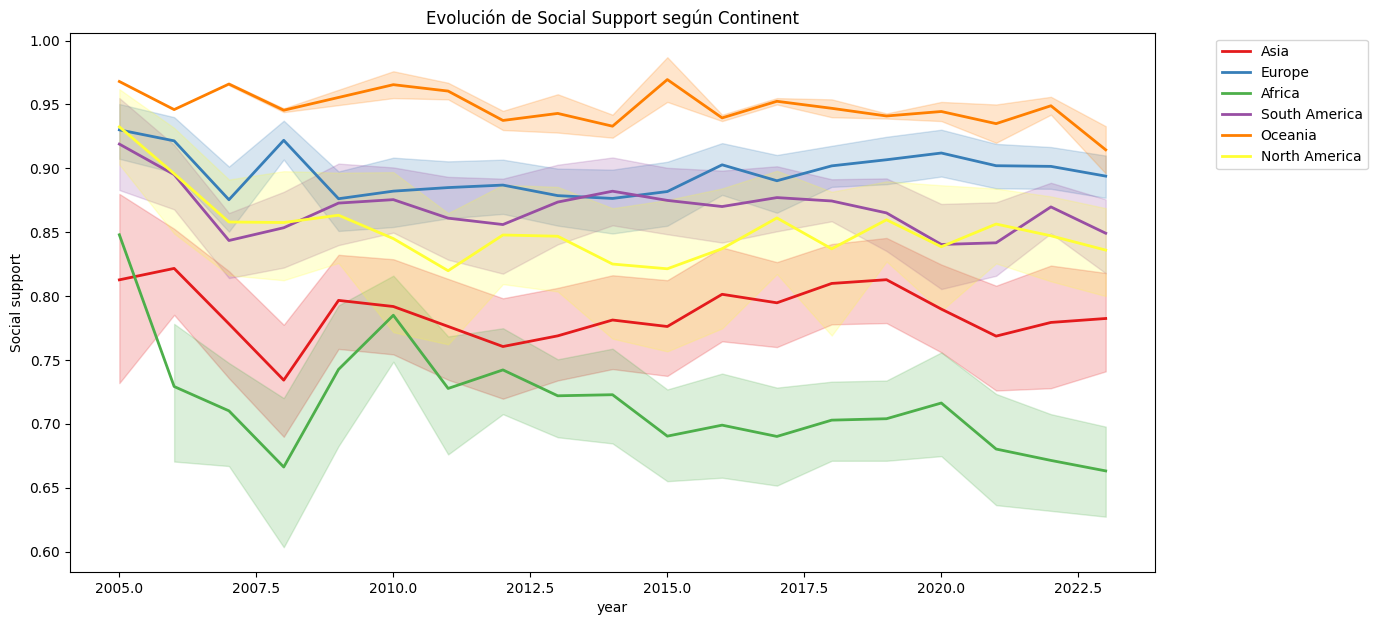

In [15]:
df_filtered = df_felicidad[(df_felicidad['year'] >= 2019) & (df_felicidad['year'] <= 2023)]
# Agrupar por 'year' y 'continent' y calcular la media para cada combinación
df_felicidad_continentes = df_filtered.groupby(['year', 'continent'])[numeric_columns].mean().reset_index()

palette = sns.color_palette("Set1", n_colors=6)
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_felicidad, x='year', y='Generosity', hue='continent', 
             linewidth=2.0, palette=palette)
plt.title('Evolución de Generosity según Continent')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Evolución de Social Support según Continent
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_felicidad, x='year', y='Social support', hue='continent', 
             linewidth=2.0, palette=palette)
plt.title('Evolución de Social Support según Continent')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [34]:
numeric_columns = ['Life Ladder', 'Log GDP per capita', 'Social support', 
                   'Healthy life expectancy at birth', 'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption', 
                   'Positive affect', 'Negative affect']

df_filtrado_asia = df_felicidad[df_felicidad['continent'] == "Asia"]
df_numeric = df_filtrado_asia[numeric_columns]
correlation_matrix = df_numeric.corr()
correlation_with_life_ladder = correlation_matrix['Life Ladder'].sort_values(ascending=False)
print("Matriz de Correlación ASIA:")
print(correlation_with_life_ladder)




Matriz de Correlación ASIA:
Life Ladder                         1.000000
Log GDP per capita                  0.703264
Social support                      0.661526
Healthy life expectancy at birth    0.559910
Positive affect                     0.512924
Freedom to make life choices        0.402128
Generosity                          0.068123
Perceptions of corruption          -0.235288
Negative affect                    -0.393389
Name: Life Ladder, dtype: float64


In [37]:
numeric_columns = ['Life Ladder', 'Log GDP per capita', 'Social support', 
                   'Healthy life expectancy at birth', 'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption', 
                   'Positive affect', 'Negative affect']

df_filtrado_europe = df_felicidad[df_felicidad['continent'] == "Europe"]
df_numeric = df_filtrado_europe[numeric_columns]
correlation_matrix = df_numeric.corr()
correlation_with_life_ladder = correlation_matrix['Life Ladder'].sort_values(ascending=False)
print("Matriz de Correlación EUROPE:")
print(correlation_with_life_ladder)




Matriz de Correlación EUROPE:
Life Ladder                         1.000000
Positive affect                     0.839385
Log GDP per capita                  0.823601
Freedom to make life choices        0.776565
Healthy life expectancy at birth    0.698284
Social support                      0.658877
Generosity                          0.544614
Negative affect                    -0.547754
Perceptions of corruption          -0.791407
Name: Life Ladder, dtype: float64


In [63]:
def matriz_correlacion(df, continent=None):
    # Asegúrate de que 'continent' es una columna en el DataFrame
    if continent:
        # Filtra el DataFrame por el continente especificado
        df_continent = df[df['continent'] == continent]
        
        # Verifica si hay datos para el continente especificado
        if df_continent.empty:
            raise ValueError(f"No hay datos para el continente '{continent}'")
        
        # Selecciona las columnas numéricas que queremos usar (excluyendo 'Country name' y 'year')
        columns = ['Life Ladder', 'Log GDP per capita', 'Social support', 
                   'Healthy life expectancy at birth', 'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption', 
                   'Positive affect', 'Negative affect']
        
        # Asegúrate de que todas las columnas numéricas existan en el DataFrame filtrado
        if all(col in df_continent.columns for col in columns):
            # Calcula la matriz de correlación
            corr_matrix = df_continent[columns].corr()
            
            # Añadir etiquetas de continente a la matriz de correlación
            corr_matrix = corr_matrix.stack().reset_index()
            corr_matrix.columns = ['Variable 1', 'Variable 2', 'Correlation']
            corr_matrix['Continent'] = continent
            
            return corr_matrix
        else:
            raise ValueError("Algunas columnas necesarias no están presentes en el DataFrame.")
    else:
        # Si no se especifica continente, devuelve la matriz combinada de todos los continentes
        matrices = []
        continents = df['continent'].unique()
        
        for continent in continents:
            # Filtra el DataFrame por continente
            df_continent = df[df['continent'] == continent]
            
            # Selecciona las columnas numéricas que queremos usar (excluyendo 'Country name' y 'year')
            columns = ['Life Ladder', 'Log GDP per capita', 'Social support', 
                       'Healthy life expectancy at birth', 'Freedom to make life choices', 
                       'Generosity', 'Perceptions of corruption', 
                       'Positive affect', 'Negative affect']
            
            # Asegúrate de que todas las columnas numéricas existan en el DataFrame filtrado
            if all(col in df_continent.columns for col in columns):
                # Calcula la matriz de correlación
                corr_matrix = df_continent[columns].corr()
                
                # Añadir etiquetas de continente a la matriz de correlación
                corr_matrix = corr_matrix.stack().reset_index()
                corr_matrix.columns = ['Variable 1', 'Variable 2', 'Correlation']
                corr_matrix['Continent'] = continent
                
                # Añadir la matriz de correlación a la lista
                matrices.append(corr_matrix)
            else:
                print(f"Algunas columnas no están presentes en el DataFrame del continente {continent}.")
        
        # Combina todas las matrices en una sola
        all_matrices = pd.concat(matrices, ignore_index=True)
        
        return all_matrices

In [65]:
matriz_correlacion(df_felicidad, continent="Asia")

,Variable 1,Variable 2,Correlation,Continent
0,Life Ladder,Life Ladder,1.000000,Asia
1,Life Ladder,Log GDP per capita,0.703264,Asia
2,Life Ladder,Social support,0.661526,Asia
3,Life Ladder,Healthy life expectancy at birth,0.559910,Asia
4,Life Ladder,Freedom to make life choices,0.402128,Asia
...,...,...,...,...
76,Negative affect,Freedom to make life choices,-0.358774,Asia
77,Negative affect,Generosity,-0.015370,Asia
78,Negative affect,Perceptions of corruption,0.174644,Asia
79,Negative affect,Positive affect,-0.393603,Asia


In [67]:
def matriz_correlacion(df, continent=None):
    # Asegúrate de que 'continent' es una columna en el DataFrame
    if continent:
        # Filtra el DataFrame por el continente especificado
        df_continent = df[df['continent'] == continent]
        
        # Verifica si hay datos para el continente especificado
        if df_continent.empty:
            raise ValueError(f"No hay datos para el continente '{continent}'")
        
        # Selecciona las columnas numéricas que queremos usar (excluyendo 'Country name' y 'year')
        columns = ['Life Ladder', 'Log GDP per capita', 'Social support', 
                   'Healthy life expectancy at birth', 'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption', 
                   'Positive affect', 'Negative affect']
        
        # Asegúrate de que todas las columnas numéricas existan en el DataFrame filtrado
        if all(col in df_continent.columns for col in columns):
            # Calcula las correlaciones de 'Life Ladder' con todas las demás variables
            correlations = df_continent[columns].corr().loc['Life Ladder']
            
            # Convierte a formato largo para facilitar la visualización
            correlations = correlations.reset_index()
            correlations.columns = ['Variable', 'Correlation']
            correlations['Continent'] = continent
            
            return correlations
        else:
            raise ValueError("Algunas columnas necesarias no están presentes en el DataFrame.")
    else:
        # Si no se especifica continente, devuelve la correlación de 'Life Ladder' con todas las variables para todos los continentes
        results = []
        continents = df['continent'].unique()
        
        for continent in continents:
            # Filtra el DataFrame por continente
            df_continent = df[df['continent'] == continent]
            
            # Selecciona las columnas numéricas que queremos usar (excluyendo 'Country name' y 'year')
            columns = ['Life Ladder', 'Log GDP per capita', 'Social support', 
                       'Healthy life expectancy at birth', 'Freedom to make life choices', 
                       'Generosity', 'Perceptions of corruption', 
                       'Positive affect', 'Negative affect']
            
            # Asegúrate de que todas las columnas numéricas existan en el DataFrame filtrado
            if all(col in df_continent.columns for col in columns):
                # Calcula las correlaciones de 'Life Ladder' con todas las demás variables
                correlations = df_continent[columns].corr().loc['Life Ladder']
                
                # Convierte a formato largo para facilitar la visualización
                correlations = correlations.reset_index()
                correlations.columns = ['Variable', 'Correlation']
                correlations['Continent'] = continent
                
                # Añadir los resultados a la lista
                results.append(correlations)
            else:
                print(f"Algunas columnas no están presentes en el DataFrame del continente {continent}.")
        
        # Combina todos los resultados en una sola tabla
        combined_results = pd.concat(results, ignore_index=True)
        
        return combined_results

In [69]:
matriz_correlacion(df_felicidad, )

,Variable,Correlation,Continent
0,Life Ladder,1.000000,Asia
1,Log GDP per capita,0.703264,Asia
2,Social support,0.661526,Asia
3,Healthy life expectancy at birth,0.559910,Asia
4,Freedom to make life choices,0.402128,Asia
...,...,...,...
58,Freedom to make life choices,NaN,None
59,Generosity,NaN,None
60,Perceptions of corruption,NaN,None
61,Positive affect,NaN,None


In [70]:
def matriz_contingencia_continente(df):
    # Asegúrate de que 'continent' es una columna en el DataFrame
    continents = df['continent'].unique()
    
    results = []
    
    # Itera sobre cada continente
    for continent in continents:
        # Filtra el DataFrame por continente
        df_continent = df[df['continent'] == continent]
        
        # Selecciona las columnas numéricas que queremos usar (excluyendo 'Country name' y 'year')
        columns = ['Life Ladder', 'Log GDP per capita', 'Social support', 
                   'Healthy life expectancy at birth', 'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption', 
                   'Positive affect', 'Negative affect']
        
        # Asegúrate de que todas las columnas numéricas existan en el DataFrame filtrado
        if all(col in df_continent.columns for col in columns):
            # Calcula las correlaciones de 'Life Ladder' con todas las demás variables
            correlations = df_continent[columns].corr().loc['Life Ladder']
            
            # Convierte a formato largo para facilitar la visualización
            correlations = correlations.reset_index()
            correlations.columns = ['Variable', 'Correlation']
            correlations['Continent'] = continent
            
            # Añadir los resultados a la lista
            results.append(correlations)
        else:
            print(f"Algunas columnas no están presentes en el DataFrame del continente {continent}.")
    
    # Combina todos los resultados en una sola tabla
    combined_results = pd.concat(results, ignore_index=True)
    
    return combined_results


In [71]:
matriz_contingencia_continente(df_felicidad)

,Variable,Correlation,Continent
0,Life Ladder,1.000000,Asia
1,Log GDP per capita,0.703264,Asia
2,Social support,0.661526,Asia
3,Healthy life expectancy at birth,0.559910,Asia
4,Freedom to make life choices,0.402128,Asia
...,...,...,...
58,Freedom to make life choices,NaN,None
59,Generosity,NaN,None
60,Perceptions of corruption,NaN,None
61,Positive affect,NaN,None
